In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def AutoCorr(serie, lags = 12):

    N = len(serie)
    cor = np.zeros(lags)
    for i in np.arange(1, lags+1):
        cor[i-1] = np.corrcoef(serie[0:(N - i)], serie[i:N])[0][1]
    
    return plt.bar(np.arange(1, lags+1), cor)

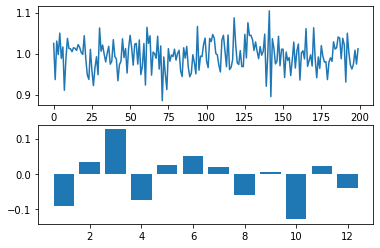

In [19]:
def WhiteNoise(mean, std, size):
    return np.random.normal(mean, std, size)

wn = WhiteNoise(mean= 1, std= 0.04, size= 200)

fig, axs = plt.subplots(2, 1)
axs[0].plot(wn)
axs[1] = AutoCorr(wn)

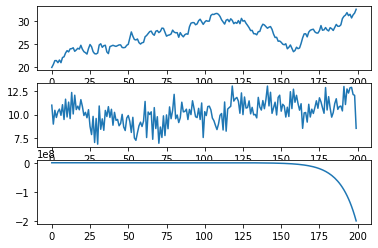

In [6]:
def Autoregressive(epslonStd = 1, mean = 1, init = [0, 2], parameters = [0.5, -0.1], size = 200):
    lags = len(parameters)
    init = np.array(init)
    parameters = np.array(parameters)
    
    for i in np.arange(size-lags):
        init = np.append(init ,( np.inner(init[i:(i+lags)] - mean, parameters) + np.random.normal(mean, epslonStd)))
        
    return init

Ar_1 = Autoregressive(epslonStd = 0.6, mean= 20, init=[20], parameters= [1])
Ar_2 = Autoregressive(mean = 10, init=[11, 9], parameters= [0.5, 0.1])
Ar_3 = Autoregressive(epslonStd= 0.2, init=[1], parameters=[1.1])


fig, axs = plt.subplots(3)
axs[0].plot(Ar_1)
axs[1].plot(Ar_2)
axs[2].plot(Ar_3)

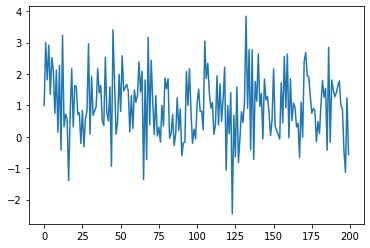

In [7]:
def MovingAverage(epslonStd = 1, mean = 1,init = [0, 2], parameters = [0.5, -0.1], size = 200):
    lags = len(parameters)
    init = np.array(init)
    parameters = np.array(parameters)
    
    for i in np.arange(size-lags):
        init = np.append(init ,( np.inner(init[i:(i+lags)], parameters) + np.random.normal(0, epslonStd)))
    
    return init + mean

plt.plot(MovingAverage())

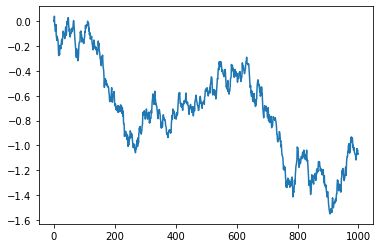

In [23]:
def BrownianMotion(size = 200):
    epslon = np.random.normal(0, 1, size)
    Bm = np.cumsum(epslon)/np.sqrt(size)

    return Bm

plt.plot(BrownianMotion(1000))

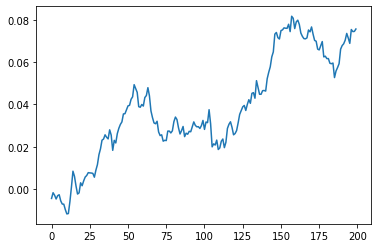

In [43]:
def AritimeticBrownianMotion(drift = 0, vol = 1, size = 200):
    Bm = BrownianMotion(size)
    t = np.arange(size)/size

    ABm = t*drift + vol*Bm

    return ABm

plt.plot(AritimeticBrownianMotion(drift=0.01, vol=0.04))

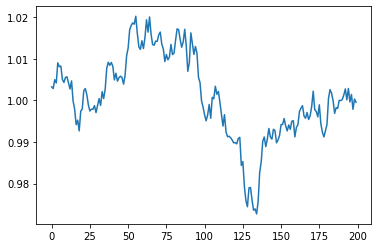

In [60]:
def GeometricBrownianMotion(drift = 0, vol = 1, size = 200):
    Bm = BrownianMotion(size)
    t = np.arange(size)/size

    GBm = np.exp((t - (vol**2)/2)*drift + vol*Bm)

    return GBm

plt.plot(GeometricBrownianMotion(drift= 0.01, vol=0.04))